In [1]:
import os
import shutil

# Define the path to your Kaggle.json file
kaggle_json_path = "kaggle.json"  # Adjust this if necessary

# Create the .kaggle directory in your user home directory
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move(kaggle_json_path, os.path.join(kaggle_dir, "kaggle.json"))

# Ensure the file has appropriate permissions
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

print("Kaggle API credentials have been configured successfully.")

Kaggle API credentials have been configured successfully.


In [2]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 9285-ACC2

 Directory of C:\Users\Dmwin\Deep Learning

10/12/2024  22:22    <DIR>          .
10/12/2024  02:46    <DIR>          ..
10/12/2024  06:11    <DIR>          .ipynb_checkpoints
10/12/2024  22:17           896,581 Cat-Dog TransferLearning classification.ipynb
10/12/2024  05:16         1,006,397 dcgan.gif
11/12/2019  04:19       851,576,689 dogs-vs-cats.zip
10/12/2024  05:17         1,436,500 Generate handwritten digit images.ipynb
10/12/2024  22:12    <DIR>          image resized
10/12/2024  03:02            97,553 image_at_epoch_0001.png
10/12/2024  03:04            27,807 image_at_epoch_0002.png
10/12/2024  03:06            67,747 image_at_epoch_0003.png
10/12/2024  03:08            59,438 image_at_epoch_0004.png
10/12/2024  03:09            54,657 image_at_epoch_0005.png
10/12/2024  03:10            65,484 image_at_epoch_0006.png
10/12/2024  03:12            49,388 image_at_epoch_0007.png
10/12/2024  03:13            53,66

In [4]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'C:/Users/Dmwin/Deep Learning/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'C:/Users/Dmwin/Deep Learning/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('C:/Users/Dmwin/Deep Learning/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [7]:
file_names = os.listdir('C:/Users/Dmwin/Deep Learning/train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

Displaying the images of dogs and cats

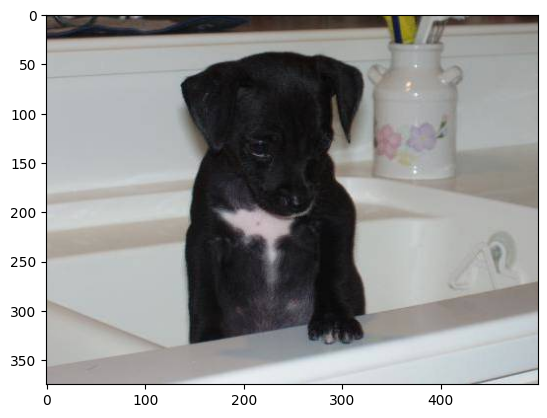

In [10]:
# display dog image
img = mpimg.imread('C:/Users/Dmwin/Deep Learning/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

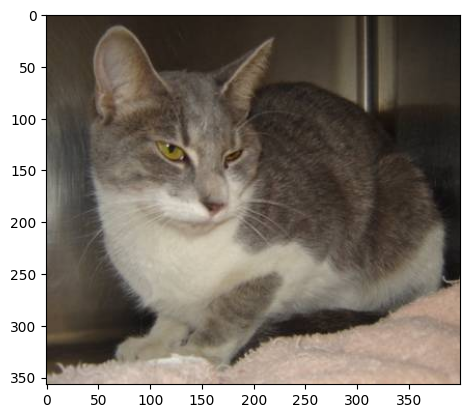

In [11]:
# display dog image
img = mpimg.imread('C:/Users/Dmwin/Deep Learning/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('C:/Users/Dmwin/Deep Learning/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
cat
cat
cat


In [13]:
file_names = os.listdir('C:/Users/Dmwin/Deep Learning/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [14]:
#creating a directory for resized images
os.mkdir('C:/Users/Dmwin/Deep Learning/image resized')

In [15]:

from PIL import Image
import random

original_folder = 'C:/Users/Dmwin/Deep Learning/train/'
resized_folder = 'C:/Users/Dmwin/Deep Learning/image resized/'

# Make sure the resized_folder exists
os.makedirs(resized_folder, exist_ok=True)

# Get a list of all files in the original folder (without sorting)
filenames = os.listdir(original_folder)

# Optional: shuffle the filenames to avoid alphabetical order
random.shuffle(filenames)

# Limit to the first 2000 files
filenames = filenames[:2000]

# Loop through the selected 2000 files
for filename in filenames:
    # Skip files that are not images (optional: you can filter by file extension)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(original_folder, filename)

        try:
            # Open and resize the image
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            # Save the resized image
            new_img_path = os.path.join(resized_folder, filename)
            img.save(new_img_path)

        except Exception as e:
            print(f"Could not process {filename}: {e}")

print("Image resizing complete!")

Image resizing complete!


Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [16]:
# creaing a for loop to assign labels
filenames = os.listdir('C:/Users/Dmwin/Deep Learning/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [17]:
print(filenames[0:5])
print(len(filenames))

['cat.10020.jpg', 'cat.10023.jpg', 'cat.1003.jpg', 'cat.10038.jpg', 'cat.10043.jpg']
2000


In [18]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [19]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1006  994]


Converting all the resized images to numpy arrays

In [22]:
import cv2
import glob

In [23]:
image_directory = 'C:/Users/Dmwin/Deep Learning/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[ 90 110 127]
   [ 79 102 118]
   [ 78  99 120]
   ...
   [ 20  74  75]
   [ 16  72  73]
   [ 15  71  72]]

  [[ 90 110 127]
   [ 84 104 121]
   [ 78 100 118]
   ...
   [ 24  73  75]
   [ 23  72  74]
   [ 21  72  74]]

  [[ 84 103 118]
   [ 83 103 120]
   [ 82 102 120]
   ...
   [ 27  68  71]
   [ 27  68  70]
   [ 27  68  70]]

  ...

  [[ 62  78  91]
   [ 71  87 100]
   [ 79  95 108]
   ...
   [ 67  78  86]
   [ 69  80  88]
   [ 62  73  81]]

  [[ 66  82  95]
   [ 71  87 100]
   [ 78  94 107]
   ...
   [ 57  68  76]
   [ 53  64  72]
   [ 50  61  69]]

  [[ 69  85  98]
   [ 71  87 100]
   [ 76  92 105]
   ...
   [ 65  76  84]
   [ 57  68  76]
   [ 57  68  76]]]


 [[[ 24  27  31]
   [ 40  45  48]
   [ 77  81  86]
   ...
   [  7   9   9]
   [  7   9   9]
   [  7   9   9]]

  [[ 20  23  27]
   [ 34  37  41]
   [ 69  73  78]
   ...
   [  5   7   7]
   [  5   7   7]
   [  5   7   7]]

  [[ 13  16  20]
   [ 23  26  30]
   [ 56  60  65]
   ...
   [  3   5   5]
   [  3   5   5]
   [  3   5

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [27]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [30]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
print(X_train_scaled)

[[[[0.60392157 0.63921569 0.62745098]
   [0.97254902 1.         0.99607843]
   [0.9372549  0.96078431 0.95686275]
   ...
   [0.98039216 0.99607843 0.97254902]
   [0.99607843 1.         0.98039216]
   [1.         1.         0.97647059]]

  [[0.59607843 0.63137255 0.61960784]
   [0.97254902 1.         0.99607843]
   [0.90196078 0.9254902  0.92156863]
   ...
   [0.98823529 1.         0.98431373]
   [0.98823529 1.         0.98039216]
   [0.99607843 1.         0.97254902]]

  [[0.61176471 0.63921569 0.62745098]
   [0.98039216 1.         0.99607843]
   [0.85098039 0.87058824 0.86666667]
   ...
   [0.98039216 1.         0.99215686]
   [0.98823529 1.         0.98431373]
   [0.98039216 0.99607843 0.97254902]]

  ...

  [[0.96470588 0.96470588 0.96470588]
   [0.98823529 0.98823529 0.98823529]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.98431373 0.98431373 0.98431373]
   [1. 

Neural Network

In [32]:

import tensorflow as tf
import tensorflow_hub as hub

In [39]:

# Load the pre-trained model (MobileNetV2 for example)
pretrained_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False)

# Ensure that the base model is not trainable, if you want to freeze it
pretrained_model.trainable = False

C:\Users\Dmwin\AppData\Local\Temp\ipykernel_1852\4036372686.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [40]:
# Define the new model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = pretrained_model(inputs)  # Extract features using MobileNetV2
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use a global average pooling layer to reduce dimensions
x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Optional: add dense layer for further learning
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)  # Output layer

# Build the complete model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,571,778 (13.63 MB)

 Trainable params: 1,313,794 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [42]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


C:\Users\Dmwin\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - acc: 0.8665 - loss: 0.4574
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 367ms/step - acc: 0.9877 - loss: 0.0397
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - acc: 0.9974 - loss: 0.0146
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - acc: 0.9967 - loss: 0.0110
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - acc: 1.0000 - loss: 0.0035


In [43]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - acc: 0.9801 - loss: 0.0538
Test Loss = 0.04530288279056549
Test Accuracy = 0.9825000166893005


Predictive System 

Path of the image to be predicted:  C:\Users\Dmwin\Deep Learning\test1\test1\9.jpg


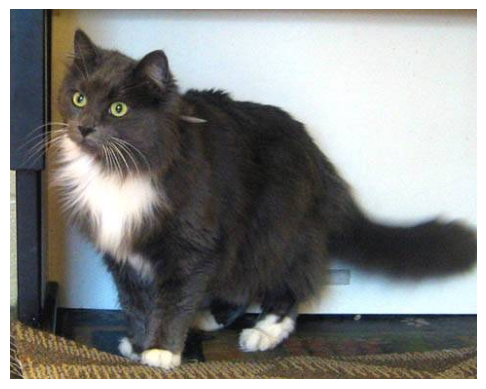

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
Prediction: [[9.9991405e-01 8.5981876e-05]]
The image represents a Cat


In [48]:
# Load the image
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Convert BGR to RGB (for correct display)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib (instead of OpenCV)
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Resize image to 224x224 (for the model)
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalize the image
input_image_scaled = input_image_resize / 255.0  # Scale pixel values between 0 and 1

# Reshape for the model (assuming the model takes input shape [1, 224, 224, 3])
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predict the class
input_prediction = model.predict(image_reshaped)

# Print the prediction
print("Prediction:", input_prediction)

# Get the predicted class label (0 or 1)
input_pred_label = np.argmax(input_prediction)

# Print the result
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')

Path of the image to be predicted:  C:\Users\Dmwin\Deep Learning\test1\test1\30.jpg


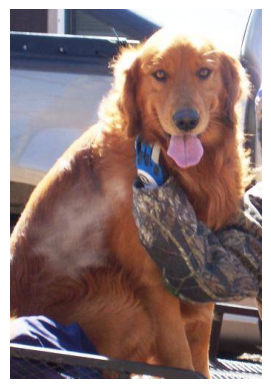

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: [[1.8993809e-06 9.9999809e-01]]
The image represents a Dog


In [49]:
# Load the image
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Convert BGR to RGB (for correct display)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib (instead of OpenCV)
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Resize image to 224x224 (for the model)
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalize the image
input_image_scaled = input_image_resize / 255.0  # Scale pixel values between 0 and 1

# Reshape for the model (assuming the model takes input shape [1, 224, 224, 3])
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predict the class
input_prediction = model.predict(image_reshaped)

# Print the prediction
print("Prediction:", input_prediction)

# Get the predicted class label (0 or 1)
input_pred_label = np.argmax(input_prediction)

# Print the result
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')